# Network Analysis

In [ ]:
!pip install networkx
!pip install matplotlib

In [ ]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import nltk

import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/comm557_network_df.csv")

# Display the first few rows of the data to understand its structure
data.head()

Unnamed: 0           source                target target_id  \
0           0  throwawaytheist            jelindrael   1793g27   
1           1       No-Sea1173            jelindrael   1793g27   
2           2       Erpelpelle           Babybabyyyx   1793f20   
3           3  Cursed_Creative  YogurtclosetSoft3850   1792v8g   
4           4     CaberTosser_              nilbogpt   1792p91   

                                             comment  
0  The Anti Planner\n\nIt's literally just a list...  
1  Don't know any books sorry. \n\nMaybe this wil...  
2  You can try to focus on your breathing, recogn...  
3  Not to discourage you, but just for N=1, my ex...  
4  Yeah. Dopamine deficiency and depression can c...

# Constructing the Network
1.Use the networkx library in Python to create a directed graph.

2.Add nodes (users) and edges (interactions) based on the source and target columns from the CSV file.

3.Visualizing the entire network using Networkx.

In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph based on the data
for index, row in data.iterrows():
    G.add_edge(row['source'], row['target'], comment=row['comment'], target_id=row['target_id'])

# Display basic info about the network
network_info = {
    "Number of Nodes": G.number_of_nodes(),
    "Number of Edges": G.number_of_edges()
}

network_info


{'Number of Nodes': 5459, 'Number of Edges': 7771}

# Original Visualization with Networkx

In [ ]:
%%time
pos = nx.spring_layout(G)

CPU times: user 2min 20s, sys: 4.12 s, total: 2min 24s
Wall time: 2min 28s


Text(0.5, 1.0, 'So Beautiful')

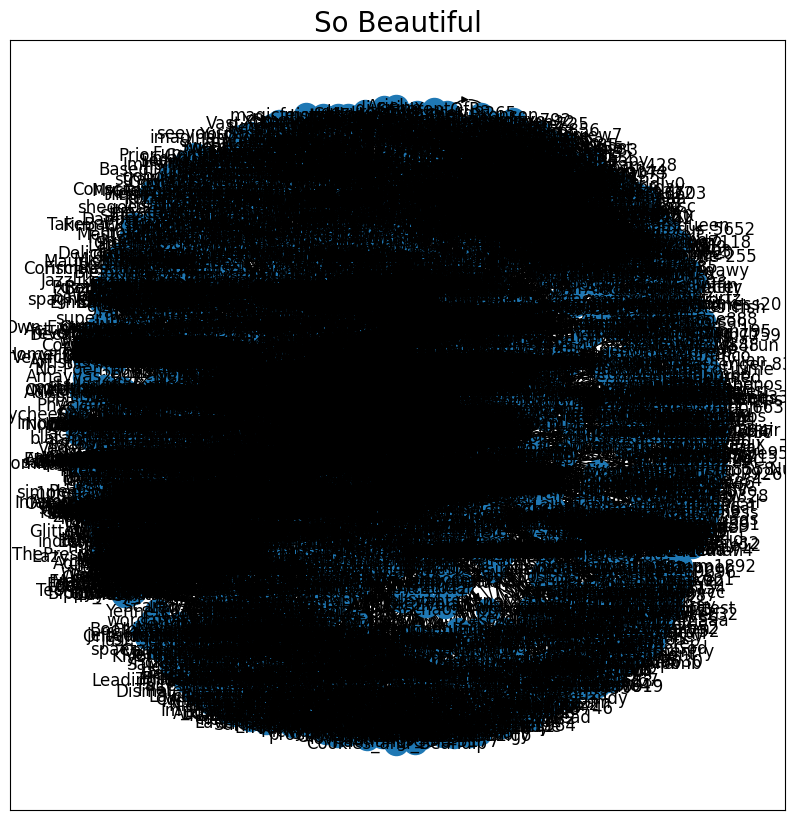

In [ ]:
plt.figure(figsize=(10,10))
nx.draw_networkx(G, pos)
plt.title("So Beautiful", fontsize= 20)

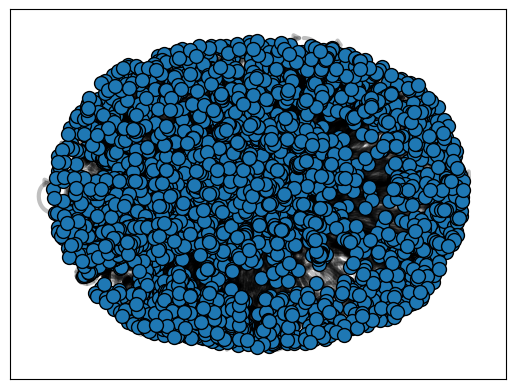

In [ ]:
nx.draw_networkx_edges(G, pos, alpha=0.25, width=3)
nx.draw_networkx_nodes(G, pos, node_size=100).set_edgecolor('black')

# Network Metrics and Analysis
1.Calculate basic network metrics: Network density, Degree distribution, Centrality measures (Degree, Closeness, Betweenness, and Eigenvector centrality)

2.Identify key influencers or hubs in the network based on centrality measures.

In [ ]:
# Calculate network density
network_density = nx.density(G)

network_density


0.0002608136297826544

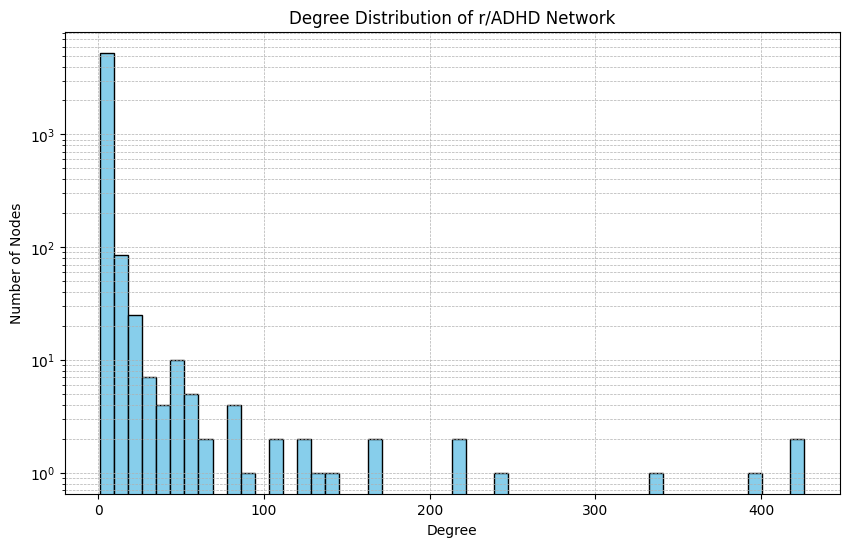

In [ ]:
#Degree distribution
import matplotlib.pyplot as plt

# Get the degrees for all nodes
degrees = [G.degree(n) for n in G.nodes()]

# Plot the degree distribution
plt.figure(figsize=(10,6))
plt.hist(degrees, bins=50, color='skyblue', edgecolor='black')
plt.title("Degree Distribution of r/ADHD Network")
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.yscale("log")  # log scale to better visualize the tail
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [ ]:
#Centrality measures (Degree, Closeness, Betweenness, and Eigenvector centrality)
nx.degree_centrality(G)
nx.closeness_centrality(G)
nx.betweenness_centrality(G, normalized=False)
nx.eigenvector_centrality(G)

{'throwawaytheist': 6.267759412628689e-38,
 'jelindrael': 6.45579219500755e-36,
 'No-Sea1173': 6.267759412628689e-38,
 'Erpelpelle': 6.267759412628689e-38,
 'Babybabyyyx': 3.259234894566919e-36,
 'Cursed_Creative': 6.267759412628689e-38,
 'YogurtclosetSoft3850': 3.259234894566919e-36,
 'CaberTosser_': 6.267759412628689e-38,
 'nilbogpt': 2.117060921637284e-22,
 'caithlynn': 6.267759412628689e-38,
 'Jay-------------': 2.1170609216371873e-22,
 'frostmw3': 6.267759412628689e-38,
 '-ADHDHDA-': 6.267759412628689e-38,
 'notlimahc': 6.267759412628689e-38,
 'NOTeRcHAThiO': 3.259234894566919e-36,
 'Debaucherous-Me': 1.4113739477581242e-22,
 'ItsAleexB21': 1.4113739477581242e-22,
 'Any_Place2814': 1.4113739477581242e-22,
 'MyFavouriteJo': 6.267759412628689e-38,
 'tyyrikki': 5.645495791032495e-22,
 'bobsnervous': 5.64549579103249e-22,
 'wrethm01': 6.267759412628689e-38,
 'OhmegaWolf': 6.267759412628689e-38,
 'yuna2491': 6.267759412628689e-38,
 'Media-consumer101': 6.267759412628689e-38,
 'ingird04

In [ ]:
#focus on the top 10 users for each centrality measure.

# Calculate degree centrality and betweenness centrality
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Sort nodes by degree centrality and betweenness centrality
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

sorted_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

sorted_degree, sorted_betweenness, sorted_closeness, sorted_eigenvector


([('trubl097', 0.0780505679736167),
  ('Waste-Carpenter-8035', 0.07750091608647856),
  ('Puporo', 0.07237083180652254),
  ('Ringleby', 0.06174422865518505),
  ('RooTT4', 0.04415536826676438),
  ('Intelligent-Let6931', 0.039758153169659215),
  ('isuck_n_malifesucks', 0.0395749358739465),
  ('StoneHyb', 0.030414071088310735),
  ('MyAppleBananaSauce', 0.03023085379259802),
  ('TheGreatWhiteQTip', 0.025833638695492853)],
 [('Waste-Carpenter-8035', 0.022096668690149188),
  ('AtomizedIndividual', 0.0213649915461214),
  ('Trash2cash4cats', 0.02048244884372606),
  ('apollosourcecode', 0.017387332555464145),
  ('ADHD_Avenger', 0.01679561039101074),
  ('DeltaTM', 0.01179048837101438),
  ('trubl097', 0.01130356443862285),
  ('isuck_n_malifesucks', 0.011028850058568159),
  ('None', 0.009943063178625875),
  ('Laney20', 0.007915888143042272)],
 [('RooTT4', 0.14018529223482065),
  ('Waste-Carpenter-8035', 0.1327445865073971),
  ('trubl097', 0.12087586373706956),
  ('coffeegrounds42', 0.11586709033013

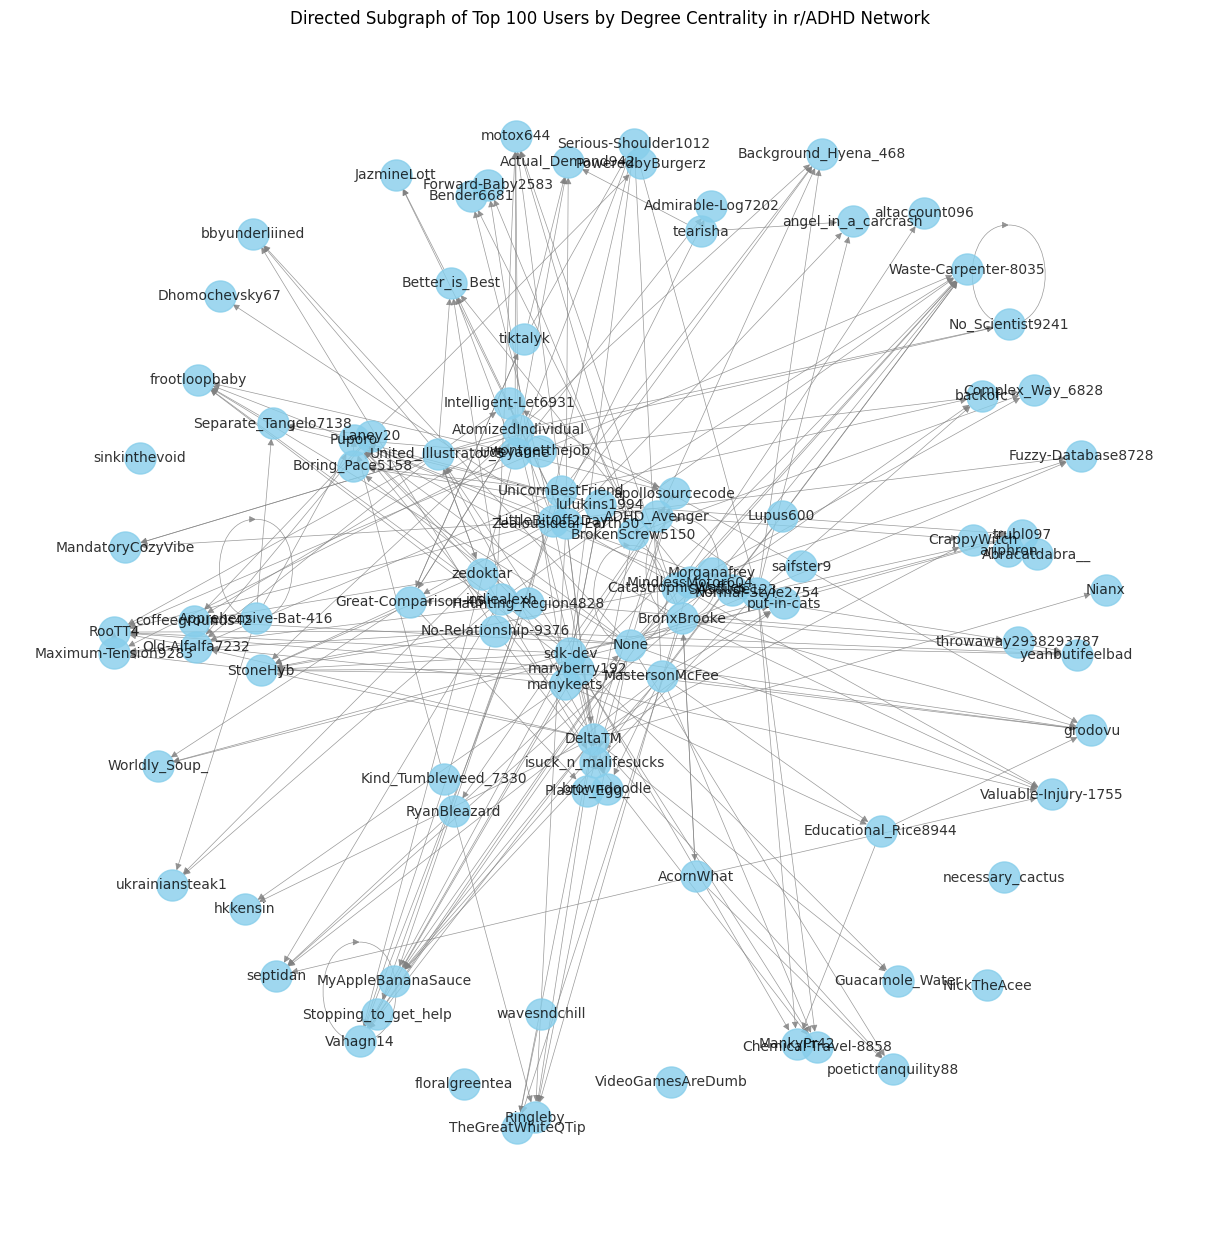

In [ ]:
#Directed Graph
# Extract top 100 users by degree centrality
top_100_users = [node for node, _ in sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:100]]

# Create a subgraph with the top users
subgraph_100 = G.subgraph(top_100_users)

# Plot the directed subgraph of top 100 users
plt.figure(figsize=(12, 12))
pos_100 = nx.spring_layout(subgraph_100)  # Layout positioning
nx.draw(subgraph_100, pos=pos_100,
        with_labels=True,  # This ensures that node labels (names) are displayed
        node_size=500,  # Increased node size for better visibility
        node_color="skyblue",
        edge_color="gray",
        width=0.5,
        arrows=True,
        font_size=10,  # Font size for node labels
        alpha=0.8)  # Added transparency for better visualization
plt.title("Directed Subgraph of Top 100 Users by Degree Centrality in r/ADHD Network")
plt.show()


# Undirected Graph

In [ ]:
import networkx as nx

import numpy as np
import nltk
import datetime

import pandas as pd
import matplotlib.pyplot as plt
import urllib, json

In [ ]:
edgelist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/comm557_network_df.csv')
edgelist

Unnamed: 0           source                target target_id  \
0              0  throwawaytheist            jelindrael   1793g27   
1              1       No-Sea1173            jelindrael   1793g27   
2              2       Erpelpelle           Babybabyyyx   1793f20   
3              3  Cursed_Creative  YogurtclosetSoft3850   1792v8g   
4              4     CaberTosser_              nilbogpt   1792p91   
...          ...              ...                   ...       ...   
8438        8438   saggywitchtits           Bartowskiii   k4dt2aw   
8439        8439     GreatBox4208  Sassybatswearinghats   k4dnu7e   
8440        8440          lghtspd  Sassybatswearinghats   k4dnu7e   
8441        8441         honeygl0        saggywitchtits   k4egf30   
8442        8442      Bartowskiii              honeygl0   k4etecp   

                                                comment  
0     The Anti Planner\n\nIt's literally just a list...  
1     Don't know any books sorry. \n\nMaybe this wil...  
2     You can try to focus on your breathing, recogn...  
3     Not to discourage you, but just for N=1, my ex...  
4     Yeah. Dopamine deficiency and depression can c...  
...                                                 ...  
8438  I have enough credits to graduate from my comm...  
8439  I feel you. I registered for two classes this ...  
8440  I did 1 online class per semester while workin...  
8441  This was my problem. I’m kind of a commitment-...  
8442              Adhd and picking psychology? Never! 😂  

[8443 rows x 5 columns]

In [ ]:
G = nx.Graph()
G.add_edges_from( edgelist[["source","target"]].values )

CC_nodes = list( nx.connected_components(G) )[0]
GG = nx.subgraph(G, CC_nodes)

node_degrees = dict(G.degree())
node_sizes = [node_degrees[node] * 10 for node in GG.nodes()]
# nodes_to_label = [node for node, size in node_sizes.items() if size > 100]

In [ ]:
edgelist[["source","target"]].values

array([['throwawaytheist', 'jelindrael'],
       ['No-Sea1173', 'jelindrael'],
       ['Erpelpelle', 'Babybabyyyx'],
       ...,
       ['lghtspd', 'Sassybatswearinghats'],
       ['honeygl0', 'saggywitchtits'],
       ['Bartowskiii', 'honeygl0']], dtype=object)

In [ ]:
pos = nx.spring_layout(GG)
# pos = nx.kamada_kawai_layout(GG)

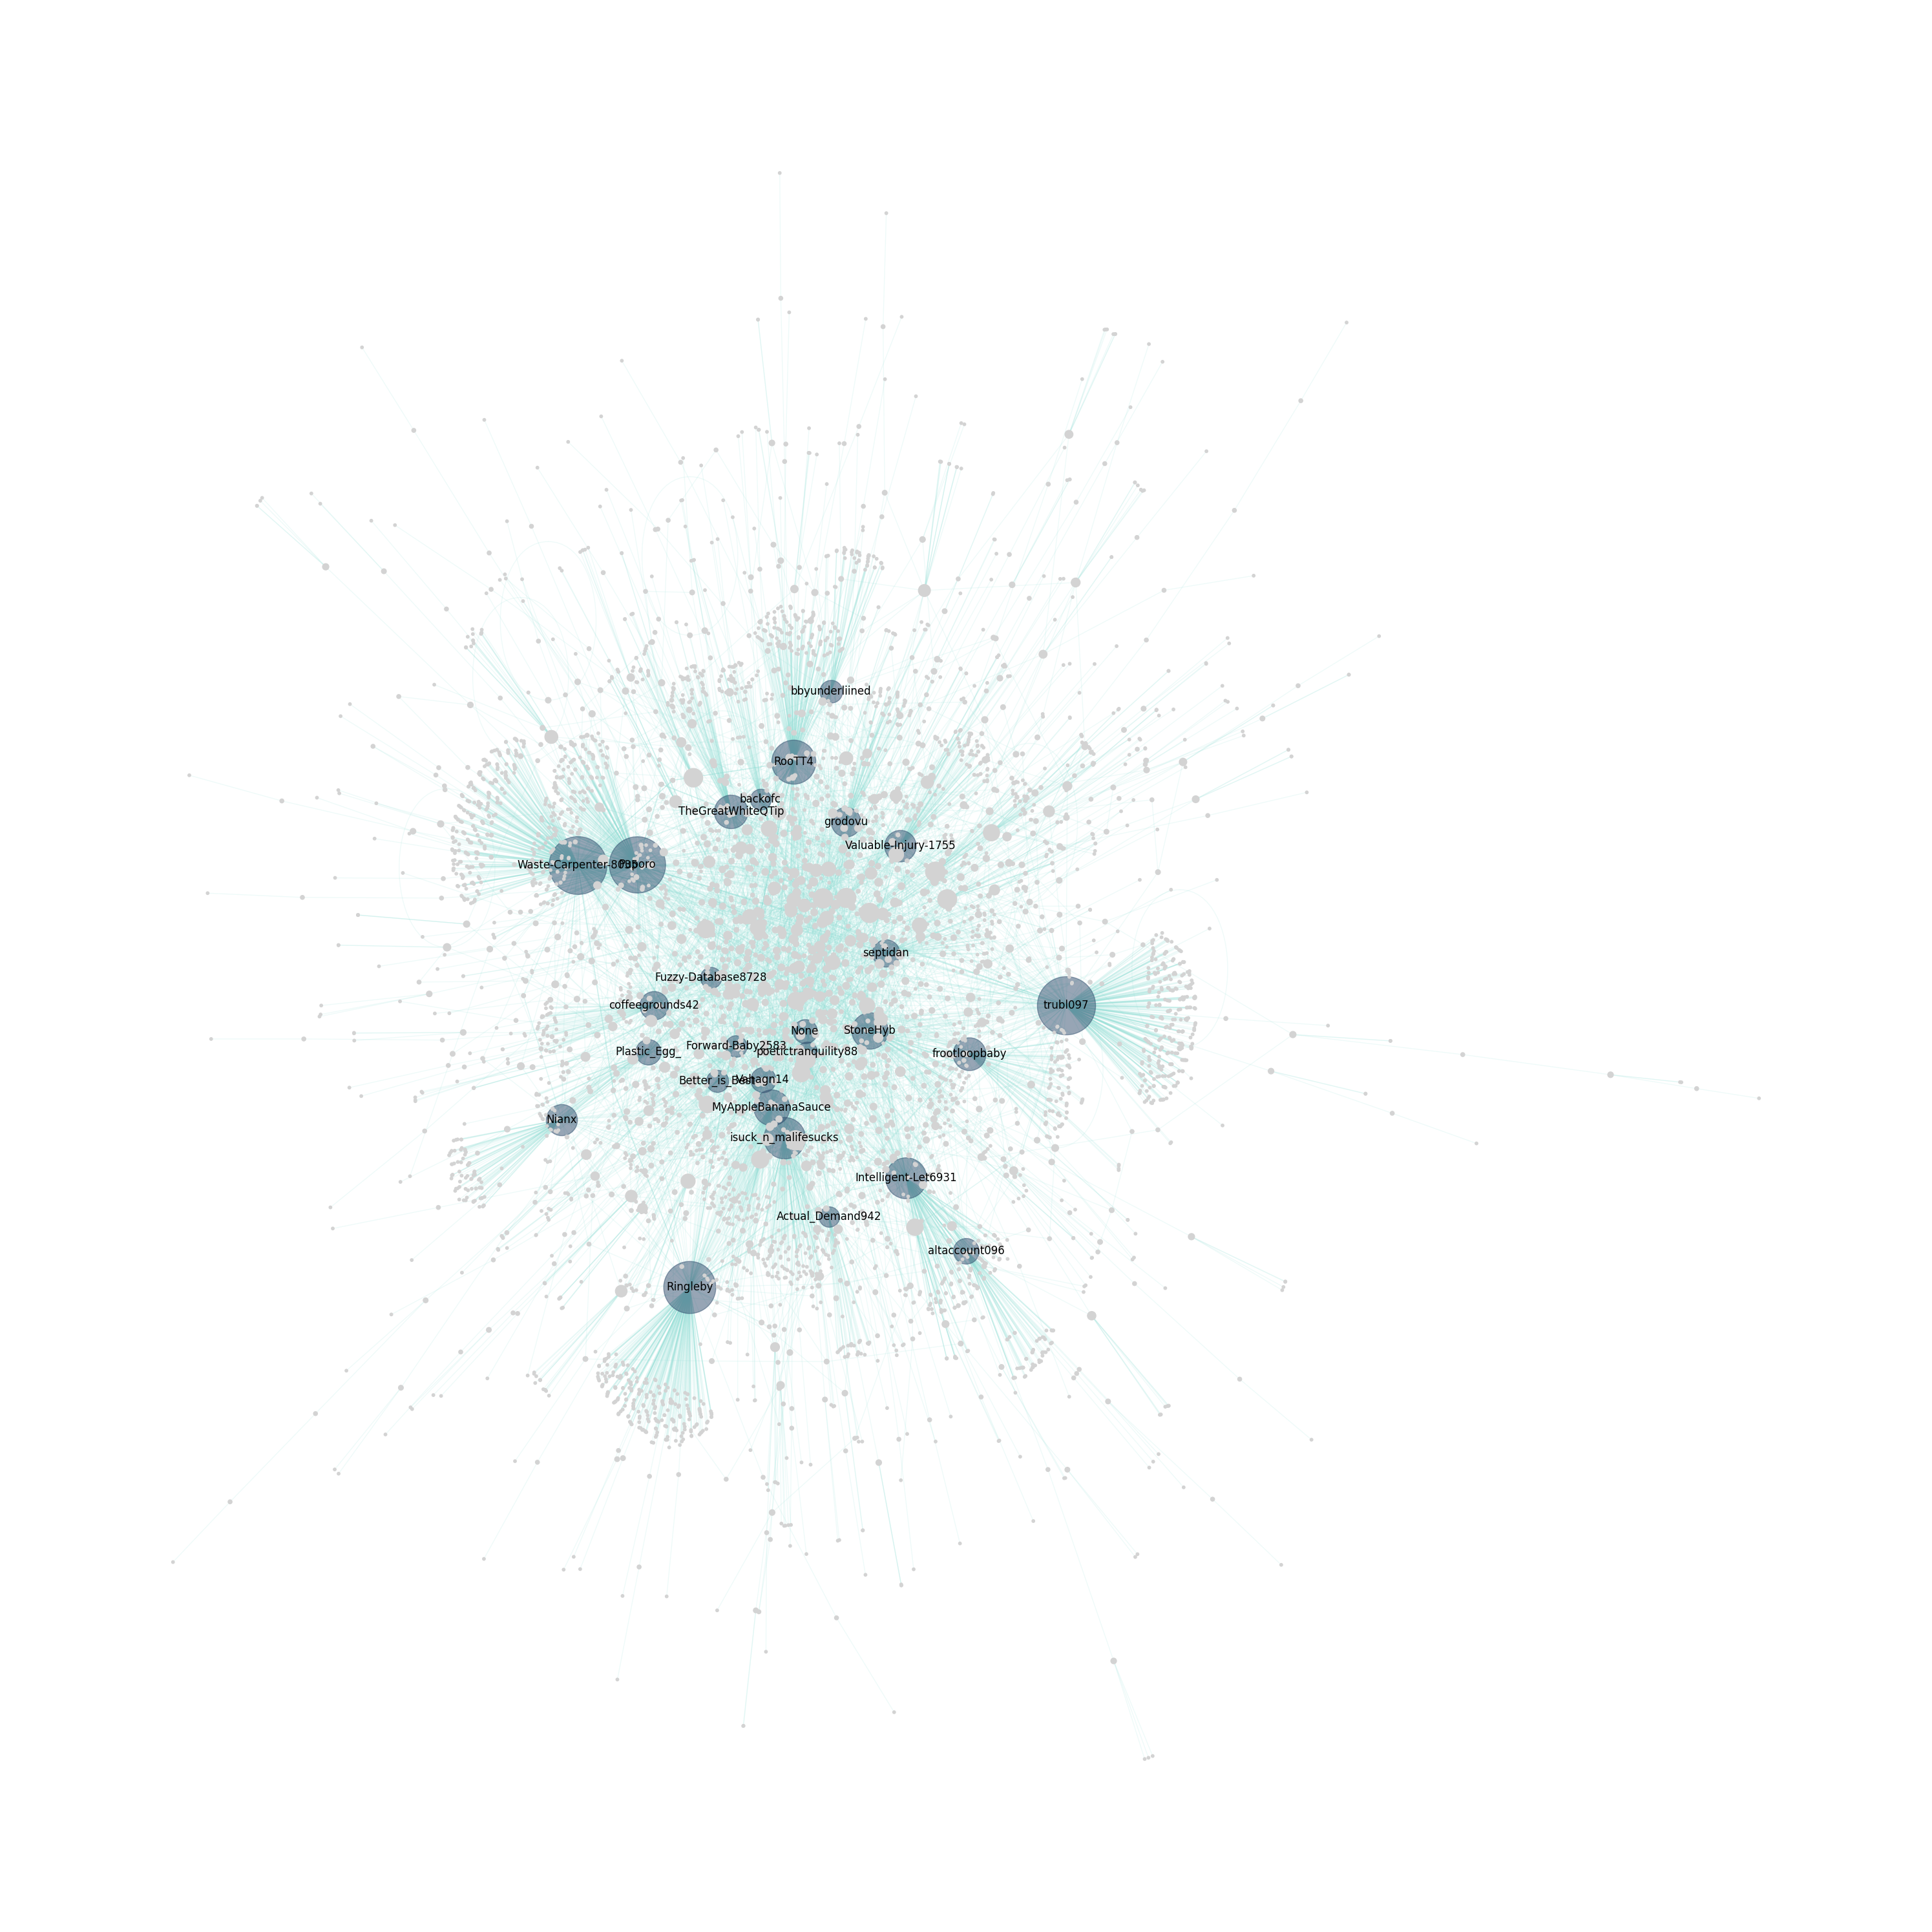

In [ ]:
plt.figure(figsize=(30,30))

# edge_colormap = plt.cm.viridis  # You can choose any colormap you prefer
# edge_color_values = np.linspace(0, 1, len(gg.edges))  # Values for colormap

# edge_colors = [edge_colormap(value) for value in edge_color_values]

for node in GG.nodes() :
    if node_sizes[list(GG.nodes()).index(node)] > 500:
        nx.draw_networkx_nodes(GG, pos, nodelist=[node], node_size=node_sizes[list(GG.nodes()).index(node)], alpha=0.5, node_color='#304D6D')
        nx.draw_networkx_labels(GG, pos, labels={node: node}, font_size=12)

other_nodes = [node for node in GG.nodes() if node_sizes[list(GG.nodes()).index(node)] <= 500]
nx.draw_networkx_nodes(GG, pos, nodelist=other_nodes, node_size=[node_sizes[list(GG.nodes()).index(node)] for node in other_nodes], node_color='lightgray')

nx.draw_networkx_edges(GG, pos, alpha=0.15, width=1, edge_color='#93E1D8')

plt.tight_layout()
plt.axis("off")
plt.show()

Final Network
Community Detection

In [ ]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the CSV file into a DataFrame
data = pd.read_csv("/content/drive/MyDrive/comm557_network_df.csv")

# Display the first few rows of the data to understand its structure
data.head()

# Create a graph from the edge list
G = nx.from_pandas_edgelist(pd, 'source', 'target')


TypeError: ignored

In [ ]:
# Apply the Louvain algorithm
partition = community_louvain.best_partition(G)


In [ ]:
# Create a color map based on communities
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
node_colors = [cmap(partition[node]) for node in G.nodes()]

# Visualize the network
plt.figure(figsize=(10, 10))
nx.draw_networkx(G, node_color=node_colors, with_labels=False, node_size=40)
plt.show()
